In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [54]:
# 1. Data Exploration
# Load the datasets
train_df = pd.read_csv(r"D:\excelr_assignment\Logistic Regression\Titanic_train.csv")
test_df = pd.read_csv(r"D:\excelr_assignment\Logistic Regression\Titanic_test.csv")

In [56]:
print("First few rows of the train dataset:")
print(train_df.head())

First few rows of the train dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0          

In [58]:
print("\nData Types and Missing Values for train data:")
print(train_df.info())
print("\nSummary Statistics for train data:")
print(train_df.describe())


Data Types and Missing Values for train data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics for train data:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.0000

In [60]:
print("First few rows of the test dataset:")
print(test_df.head())

First few rows of the test dataset:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [62]:
print("\nData Types and Missing Values for test data:")
print(test_df.info())
print("\nSummary Statistics for test data:")
print(test_df.describe())


Data Types and Missing Values for test data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None

Summary Statistics for test data:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590

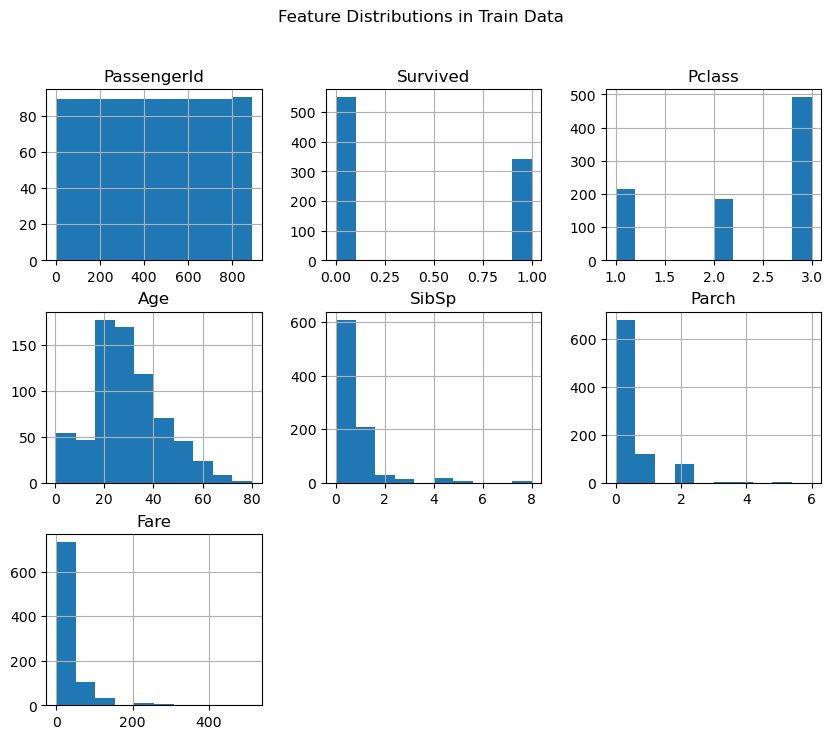

In [64]:
# Visualizations for train dataset
train_df.hist(bins=10, figsize=(10, 8))
plt.suptitle("Feature Distributions in Train Data")
plt.show()

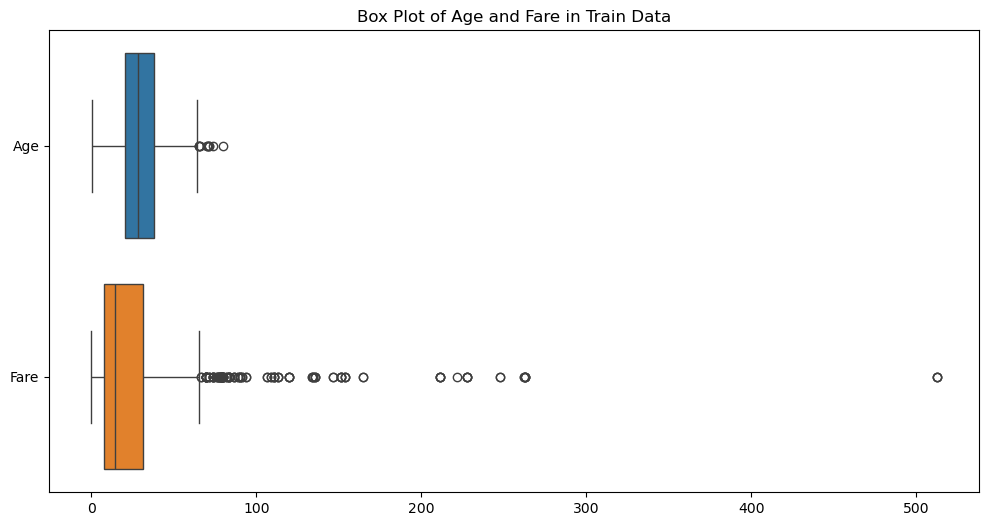

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df[['Age', 'Fare']], orient="h")
plt.title("Box Plot of Age and Fare in Train Data")
plt.show()

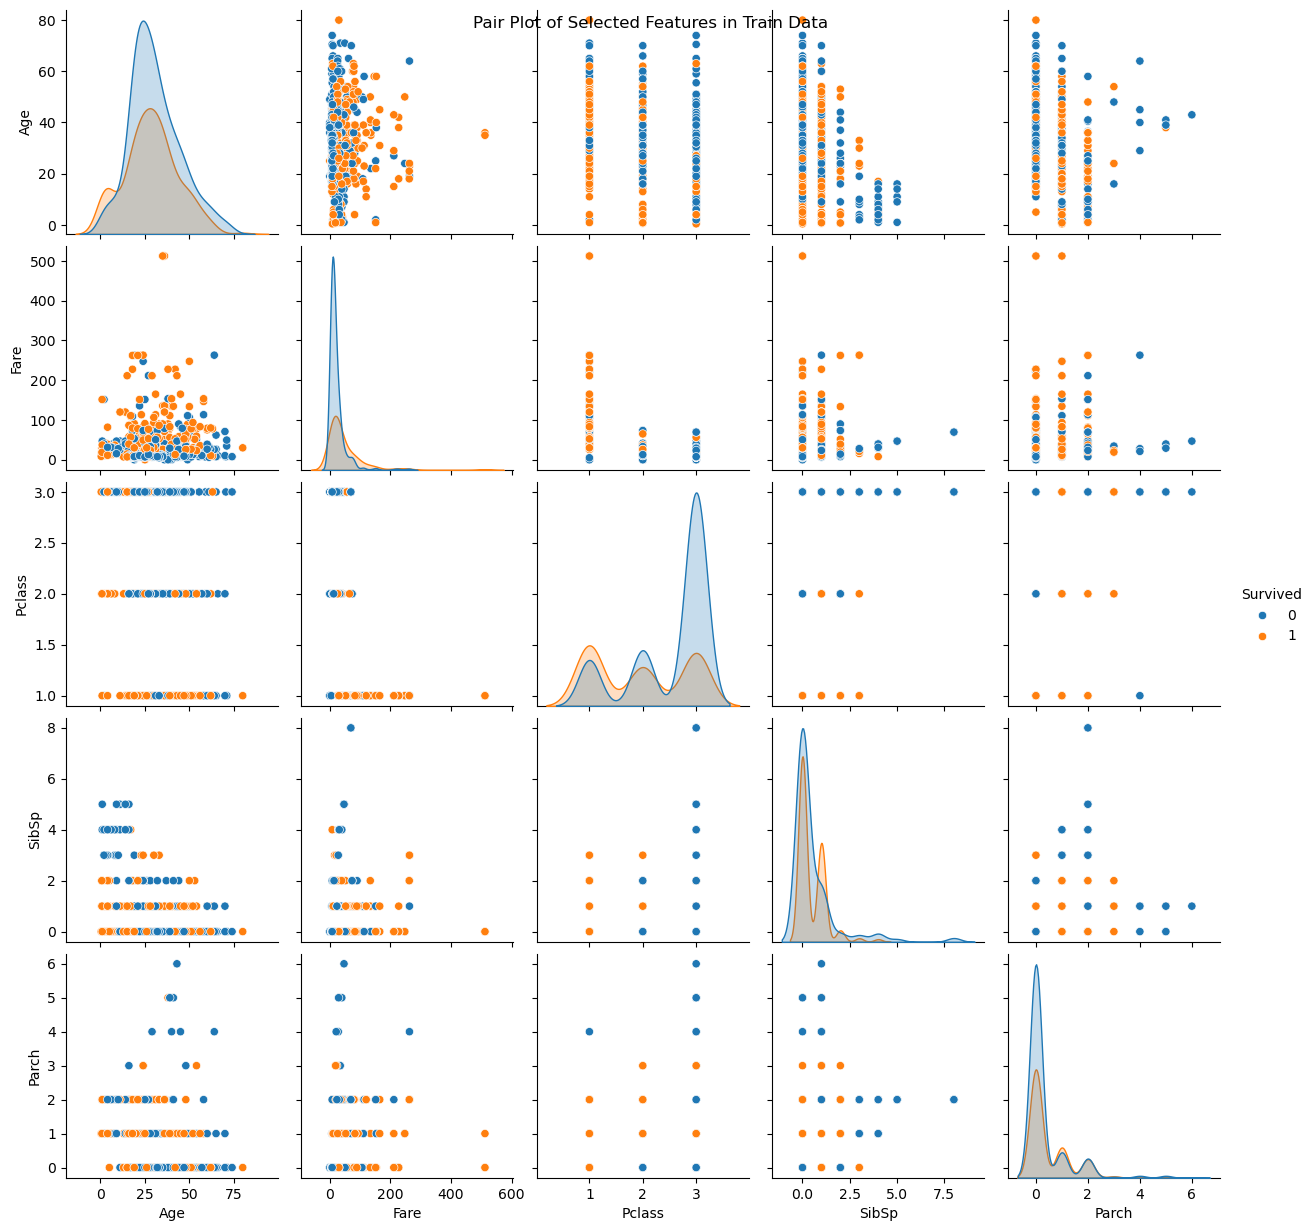

In [66]:
sns.pairplot(train_df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']], hue='Survived')
plt.suptitle("Pair Plot of Selected Features in Train Data")
plt.show()

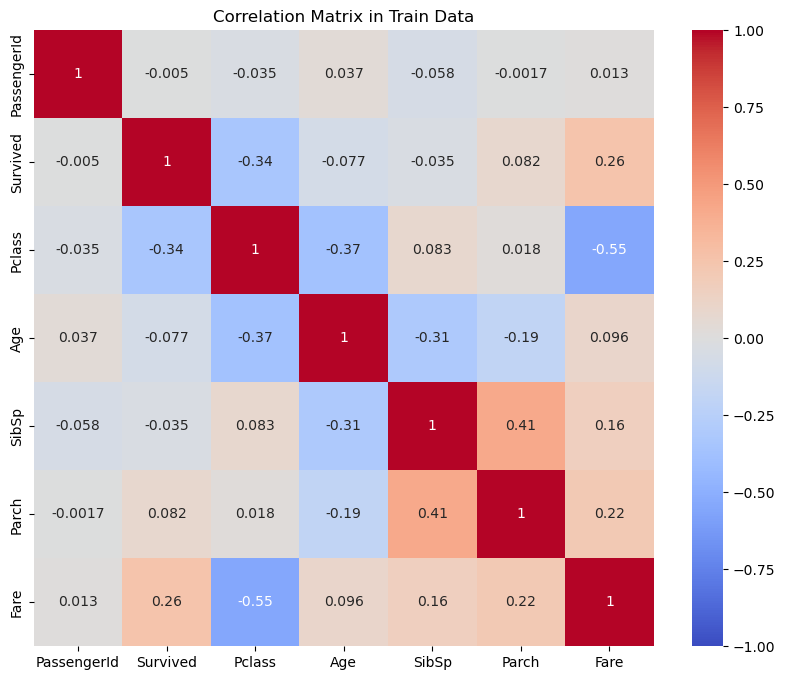

In [67]:
# Select only numeric columns for the correlation matrix
numeric_train_df = train_df.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_train_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix in Train Data")
plt.show()


In [69]:
def preprocess_data(df, is_train=True):
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    if 'Fare' in df.columns:
        df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
    
    
    df = df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], errors='ignore')
    
    # Encode categorical variables (example for 'Sex' and 'Embarked')
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    
    return df
preprocess_data(train_df,is_train  = True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,False,True
1,1,1,0,38.000000,1,0,71.2833,False,False
2,1,3,0,26.000000,0,0,7.9250,False,True
3,1,1,0,35.000000,1,0,53.1000,False,True
4,0,3,1,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,False,True
887,1,1,0,19.000000,0,0,30.0000,False,True
888,0,3,0,29.699118,1,2,23.4500,False,True
889,1,1,1,26.000000,0,0,30.0000,False,False


In [71]:
# 2. Data Preprocessing

# Define a preprocessing function to apply to both train and test data
def preprocess_data(df, is_train=True):
   
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    if 'Fare' in df.columns:
        df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

    
    df = df.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], errors='ignore')

    # Encode categorical variables
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
    df = pd.get_dummies(df, columns=['Embarked', 'Pclass'], drop_first=True)
    
    if is_train:
        X = df.drop(columns=['Survived'])
        y = df['Survived']
        return X, y
    else:
        return df

In [72]:
# Apply preprocessing to both datasets
X_train, y_train = preprocess_data(train_df)
X_test = preprocess_data(test_df, is_train=False)


In [73]:
# Standardize numerical features
scaler = StandardScaler()
X_train[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(X_train[['Age', 'Fare', 'SibSp', 'Parch']])
X_test[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.transform(X_test[['Age', 'Fare', 'SibSp', 'Parch']])

In [74]:
# 3. Model Building
# Build and train a logistic regression model
classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [75]:
# 4. Model Evaluation

# Predictions on train set
y_train_pred = classifier.predict(X_train)


In [76]:
# Calculate performance metrics on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, classifier.predict_proba(X_train)[:, 1])

In [77]:
print("\nModel Evaluation on Train Set:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print(f"ROC-AUC Score: {train_roc_auc:.2f}")


Model Evaluation on Train Set:
Accuracy: 0.81
Precision: 0.77
Recall: 0.70
F1 Score: 0.73
ROC-AUC Score: 0.86


In [78]:
# Predictions on test set
y_test_pred = classifier.predict(X_test)

# Save predictions for submission or further evaluation
test_predictions = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_test_pred})
test_predictions.to_csv("titanic_test_predictions.csv", index=False)

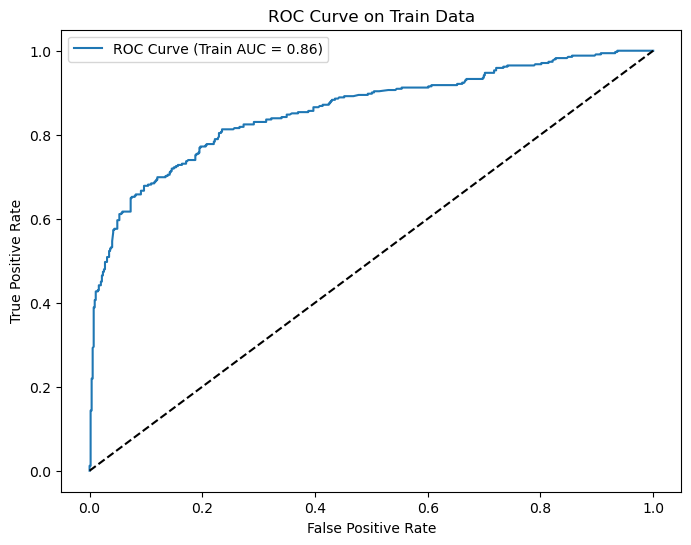

In [79]:
# Visualize ROC curve on train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, classifier.predict_proba(X_train)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"ROC Curve (Train AUC = {train_roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Train Data")
plt.legend(loc="best")
plt.show()


In [80]:
# 5. Interpretation

# Interpret the coefficients of the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': classifier.coef_[0]
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
print(coefficients)

print("\nInterpretation of Features:")
print("Positive coefficients indicate that as the feature value increases, the likelihood of survival increases.")
print("Negative coefficients indicate that as the feature value increases, the likelihood of survival decreases.")
print("For example, a high positive coefficient for 'Fare' means that higher ticket prices are associated with higher survival probability.")
print("A large negative coefficient for 'Sex_male' indicates that males were less likely to survive.")


Feature Coefficients:
      Feature  Coefficient
4        Fare     0.162808
5  Embarked_Q    -0.045771
3       Parch    -0.076163
2       SibSp    -0.343811
6  Embarked_S    -0.436720
1         Age    -0.469778
7    Pclass_2    -0.733473
8    Pclass_3    -1.913733
0         Sex    -2.588637

Interpretation of Features:
Positive coefficients indicate that as the feature value increases, the likelihood of survival increases.
Negative coefficients indicate that as the feature value increases, the likelihood of survival decreases.
For example, a high positive coefficient for 'Fare' means that higher ticket prices are associated with higher survival probability.
A large negative coefficient for 'Sex_male' indicates that males were less likely to survive.


## Deployment with Streamlit

In [102]:
import pickle
filename = 'model.pkl'
pickle.dump(classifier, open(filename,'wb'))

In [104]:
#clf = pickle.load(open('app.py','rb'))

In [106]:
# app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load the model (assuming you saved it as model.pkl)
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title("Titanic Survival Prediction")

# Input fields for user data
pclass = st.selectbox("Passenger Class", [1, 2, 3])
age = st.slider("Age", 0, 100, 30)
fare = st.slider("Fare", 0, 500, 30)
sex = st.selectbox("Gender", ["male", "female"])
embarked = st.selectbox("Port of Embarkation", ["C", "Q", "S"])

# Convert inputs to model format
sex_male = 1 if sex == "male" else 0
embarked_Q = 1 if embarked == "Q" else 0
embarked_S = 1 if embarked == "S" else 0

# Create DataFrame for prediction
input_data = pd.DataFrame([[pclass, age, fare, sex_male, embarked_Q, embarked_S]], 
                          columns=['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'])

# Prediction
if st.button("Predict"):
    survival_probability = model.predict_proba(input_data)[:, 1][0]
    if survival_probability > 0.5:
        st.write(f"The model predicts survival with a probability of {survival_probability:.2f}")
    else:
        st.write(f"The model predicts no survival with a probability of {1 - survival_probability:.2f}")


2024-11-04 19:06:38.831 
  command:

    streamlit run D:\Download\anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [108]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
2.
Cross-validation is a technique used to evaluate the performance of a machine learning model by splitting the data into multiple subsets, 
or "folds." It’s commonly used to assess how well a model generalizes to unseen data, especially in binary classification tasks. The most common 
type is k-fold cross-validation, where the dataset is divided into k subsets. The model is trained on k-1 folds and validated on the remaining fold, 
repeating this process k times so that each fold is used as the validation set once. The results are then averaged to provide an overall performance
score.
